# 1. Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model. 
## R&D Spend -- Research and devolop spend in the past few years.
## Administration -- spend on administration in the past few years
## Marketing Spend -- spend on Marketing in the past few years
## State -- states from which data is collected
## Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data=pd.read_csv('F:/ExcelR workings/Assignments/Multi Linear Regression/50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# There is no null values

In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# State column is not required
data1 = data.drop(['State'],axis=1)

In [8]:
Data=data1.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'MS'},axis=1)

In [9]:
Data.head()

,RD,Admin,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [10]:
Data1=Data.copy()

<AxesSubplot:>

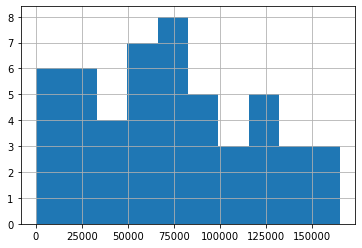

In [11]:
Data['RD'].hist()

<AxesSubplot:>

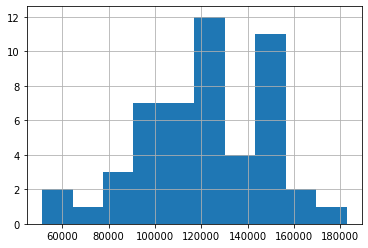

In [12]:
Data['Admin'].hist()

<AxesSubplot:>

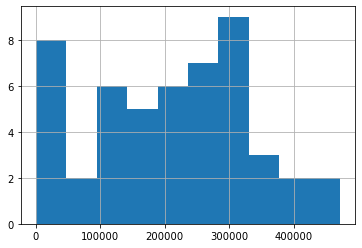

In [13]:
Data['MS'].hist()

<AxesSubplot:>

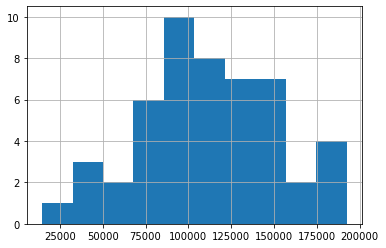

In [14]:
Data['Profit'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0xc0e113db50>,
 'caps': [<matplotlib.lines.Line2D at 0xc0e114d250>,
 'boxes': [<matplotlib.lines.Line2D at 0xc0e113d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0xc0e114d910>],
 'fliers': [<matplotlib.lines.Line2D at 0xc0e114dc70>],
 'means': []}

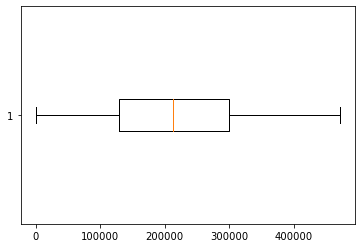

In [15]:
plt.boxplot(Data['MS'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0xc0e119ac10>,
 'caps': [<matplotlib.lines.Line2D at 0xc0e11a7310>,
 'boxes': [<matplotlib.lines.Line2D at 0xc0e119a8b0>],
 'medians': [<matplotlib.lines.Line2D at 0xc0e11a79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc0e11a7d30>],
 'means': []}

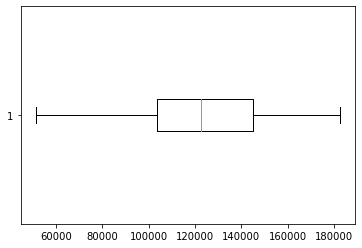

In [16]:
plt.boxplot(Data['Admin'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0xc0e11fe730>,
 'caps': [<matplotlib.lines.Line2D at 0xc0e11fee20>,
 'boxes': [<matplotlib.lines.Line2D at 0xc0e11fe3d0>],
 'medians': [<matplotlib.lines.Line2D at 0xc0e120a520>],
 'fliers': [<matplotlib.lines.Line2D at 0xc0e120a8b0>],
 'means': []}

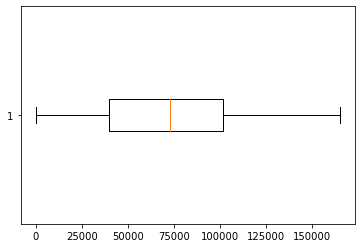

In [17]:
plt.boxplot(Data['RD'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0xc0e12602e0>,
 'caps': [<matplotlib.lines.Line2D at 0xc0e12609a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc0e1253f40>],
 'medians': [<matplotlib.lines.Line2D at 0xc0e126c0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc0e126c400>],
 'means': []}

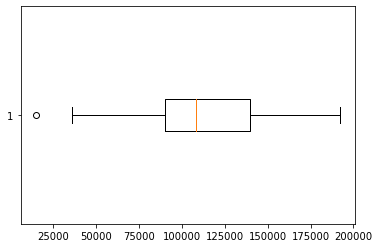

In [18]:
plt.boxplot(Data['Profit'],vert=False)

In [19]:
Data.head()

,RD,Admin,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [20]:
Data.corr()

,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Preparing a model

In [21]:
#Build Model
model=smf.ols('Profit~MS+Admin+RD',data=Data).fit()

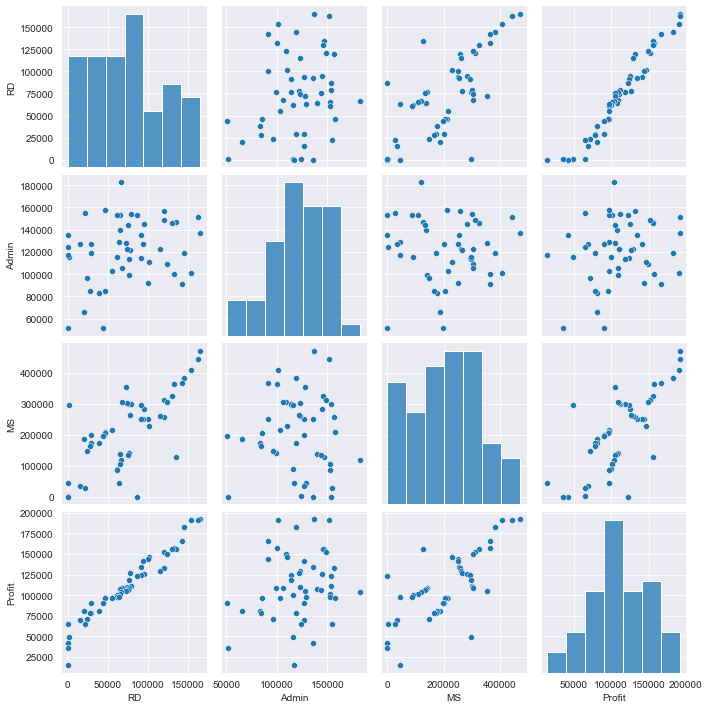

In [22]:
sns.set_style(style='darkgrid') 
sns.pairplot(Data)

In [23]:
#Cofficients(beta 0 beta 1 and so on)
model.params

Intercept    50122.192990
MS               0.027228
Admin           -0.026816
RD               0.805715
dtype: float64

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
MS            1.655077
Admin        -0.525507
RD           17.846374
dtype: float64 
 Intercept    1.057379e-09
MS           1.047168e-01
Admin        6.017551e-01
RD           2.634968e-22
dtype: float64


In [25]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 23 May 2021   Prob (F-statistic):           4.53e-30
Time:                        15:03:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
RD             0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [27]:
M1_MS=smf.ols('Profit~MS',data=Data).fit()
#T and P values
print(M1_MS.tvalues,M1_MS.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


### Marketing is significiant.

In [28]:
M1_Admin=smf.ols('Profit~Admin',data=Data).fit()
#T and P values
print(M1_Admin.tvalues,M1_Admin.pvalues)

Intercept    3.040044
Admin        1.419493
dtype: float64 Intercept    0.003824
Admin        0.162217
dtype: float64


### Adminstration is still insignificiant.

In [29]:
M1_AM=smf.ols('Profit~Admin+MS',data=Data).fit()
#T and P values
print(M1_AM.tvalues,M1_AM.pvalues)

Intercept    1.142741
Admin        2.467779
MS           8.281039
dtype: float64 Intercept    2.589341e-01
Admin        1.729198e-02
MS           9.727245e-11
dtype: float64


In [30]:
M1_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 23 May 2021   Prob (F-statistic):           2.50e-10
Time:                        15:03:36   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Both are Significiant, but the intercept becomes insignificant.

### Looking into VIF plot to check if there is any dependency among input variables.

# Calculating VIF

In [31]:
rsq_MS=smf.ols('MS~Admin+RD', data =Data).fit().rsquared
vif_MS =1/(1-rsq_MS)


rsq_Admin=smf.ols('Admin~MS+RD', data =Data).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_RD=smf.ols('RD~MS+Admin', data =Data).fit().rsquared
vif_RD=1/(1-rsq_RD)


# Storing vif values in  a data frame
D1 ={'Variables':['MS','Admin','RD'],'VIF': [vif_MS,vif_RD,vif_Admin]}
vif_frame = pd.DataFrame(D1)
vif_frame

,Variables,VIF
0,MS,2.326773
1,Admin,2.468903
2,RD,1.175091


### All VIF values are below 20 so there is no dependency among input variables.


# Residual Analysis

In [32]:
## Test for Normality of Residuals(Q-Q Plot)

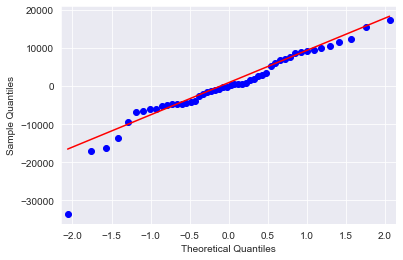

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [34]:
list(np.where(model.resid<-0.6))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49], dtype=int64)]

In [35]:
# Residual Plot for Homoscedasticity

In [36]:
def get_standardized_values( vals):
    return (vals - vals.mean())/vals.std()

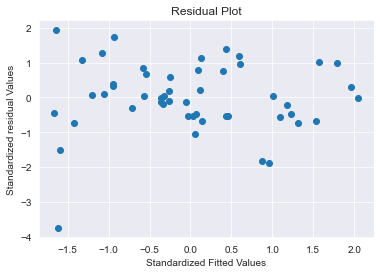

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual Values')
plt.show()

In [38]:
# Residual Vs Regressors

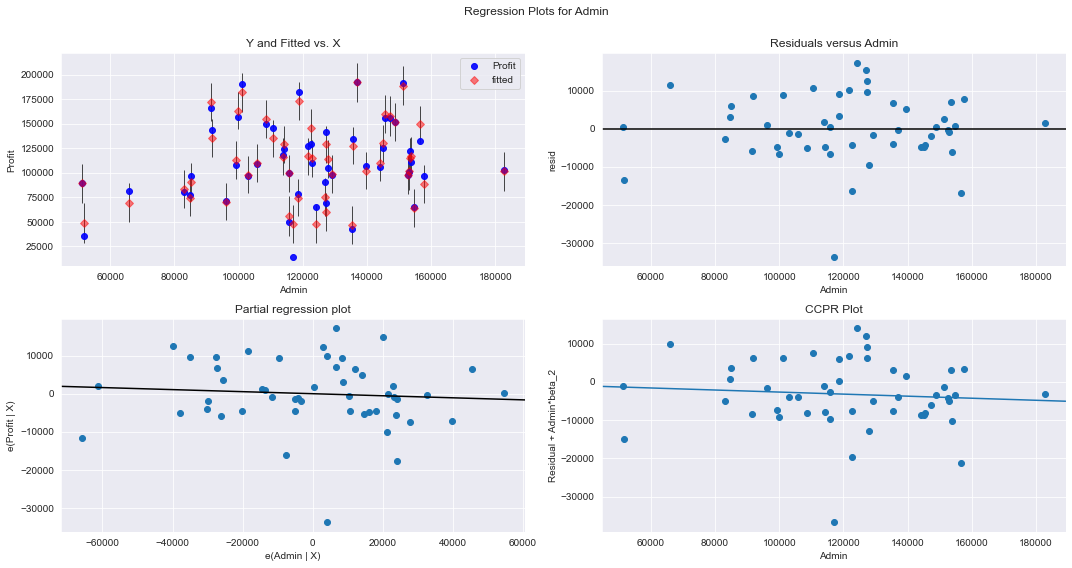

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig =fig)
plt.show()

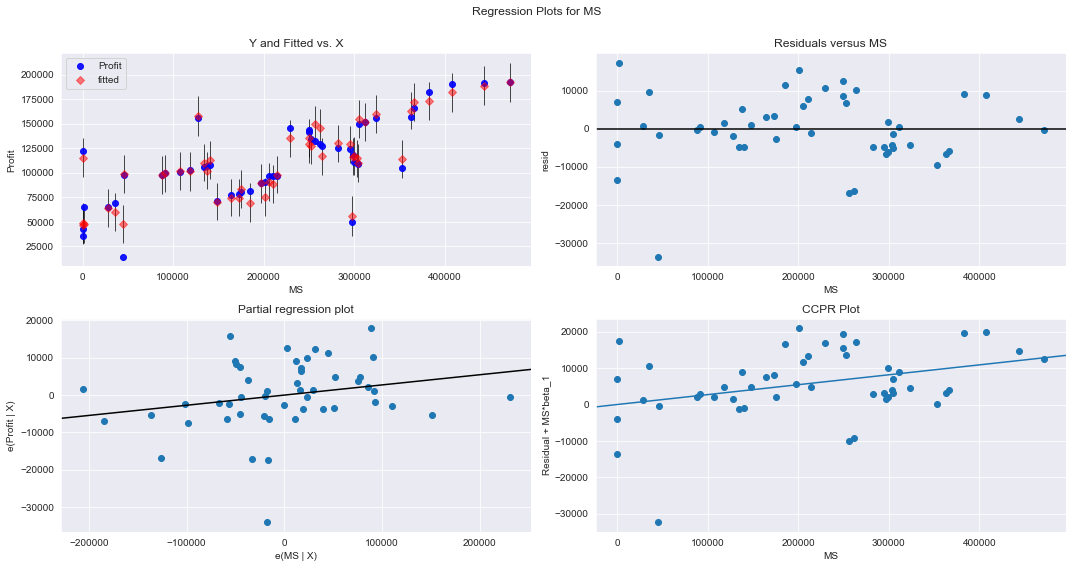

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig =fig)
plt.show()

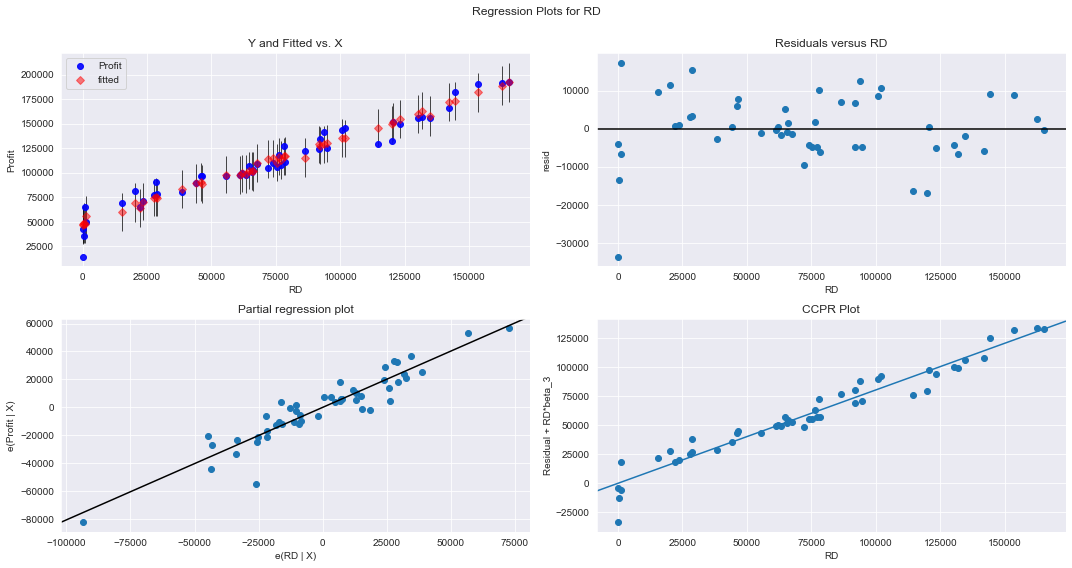

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig =fig)
plt.show()

# Model Deletion Diagnostics

In [42]:
#Detecting Influencers/Outliers

In [43]:
#Cooks Distance
model1_influence = model.get_influence()
(c, _) = model1_influence.cooks_distance

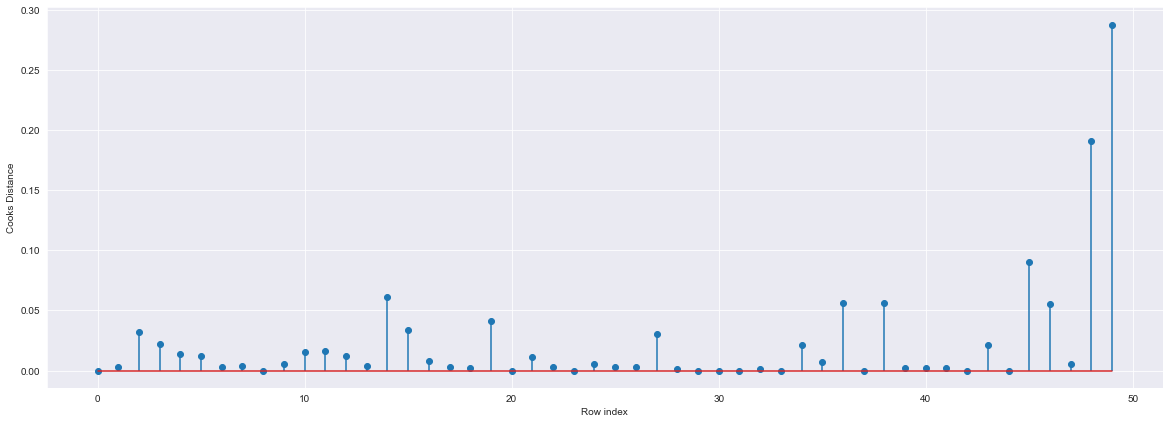

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
# index and value of influencer
(np.argmax(c),np.max(c))

(49, 0.28808229275432673)

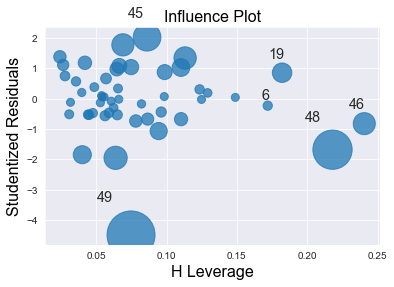

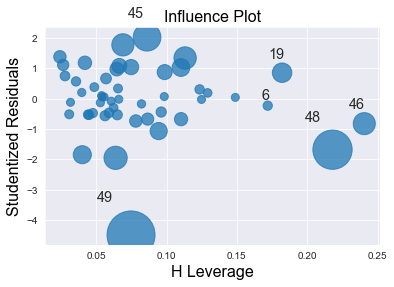

In [46]:
influence_plot(model)

# Improving the model where high infulence points are present.

In [47]:
# Removing 49 and checking for significance.
Data.drop(Data.index[[49]],axis=0,inplace=True)

In [48]:
model1=smf.ols('Profit~MS+Admin+RD',data=Data).fit()

In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 23 May 2021   Prob (F-statistic):           8.85e-32
Time:                        15:04:22   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
RD             0.7830      0.038     20.470      0.000       0.706       0.860
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Still MS and Admin are insignificant. 

### As the correlation value between Profit and Administration is low and the Adminstration alone is insignificant. lets remove Administration variable.

In [50]:
#Build Model without Adminstration
model2=smf.ols('Profit~MS+RD',data=Data).fit()

In [51]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sun, 23 May 2021   Prob (F-statistic):           3.74e-33
Time:                        15:04:36   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
MS             0.0274      0.013      2.104      0.041       0.001       0.054
RD             0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### All are significant now, So we can consider it as a final model.

In [53]:
finalmodel=smf.ols('Profit~MS+RD',data=Data).fit()

In [54]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sun, 23 May 2021   Prob (F-statistic):           3.74e-33
Time:                        15:04:53   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
MS             0.0274      0.013      2.104      0.041       0.001       0.054
RD             0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-squared value also showing that this is a best model.

In [55]:
## prediction
pred_data=pd.DataFrame(Data)
Final_pred=finalmodel.predict(pred_data)

In [56]:
D={"Real Value":Data["Profit"],"finalmodel":Final_pred} 

In [57]:
Result_frame=pd.DataFrame(D)

In [58]:
Result_frame

,Real Value,finalmodel
0,192261.83,190942.726927
1,191792.06,188043.924520
2,191050.39,179957.312472
3,182901.99,172246.416164
4,166187.94,170022.687457
5,156991.12,161999.405410
6,156122.51,157669.178690
7,155752.60,159705.298181
8,152211.77,151804.380605
9,149759.96,153787.521922
